# Classificação binária

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('dados_voz_genero.csv')

In [3]:
# selecionando as colunas para utilizar
feature_cols = ['sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt', 'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 
                'minfun', 'maxfun', 'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx']
df.describe()
#tentar normalizar skew, kurt, maxdom, dfrange

,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752,0.500000
std,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454,0.500079
min,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000,0.000000
25%,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766,0.000000
50%,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357,0.500000
75%,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183,1.000000
max,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374,1.000000


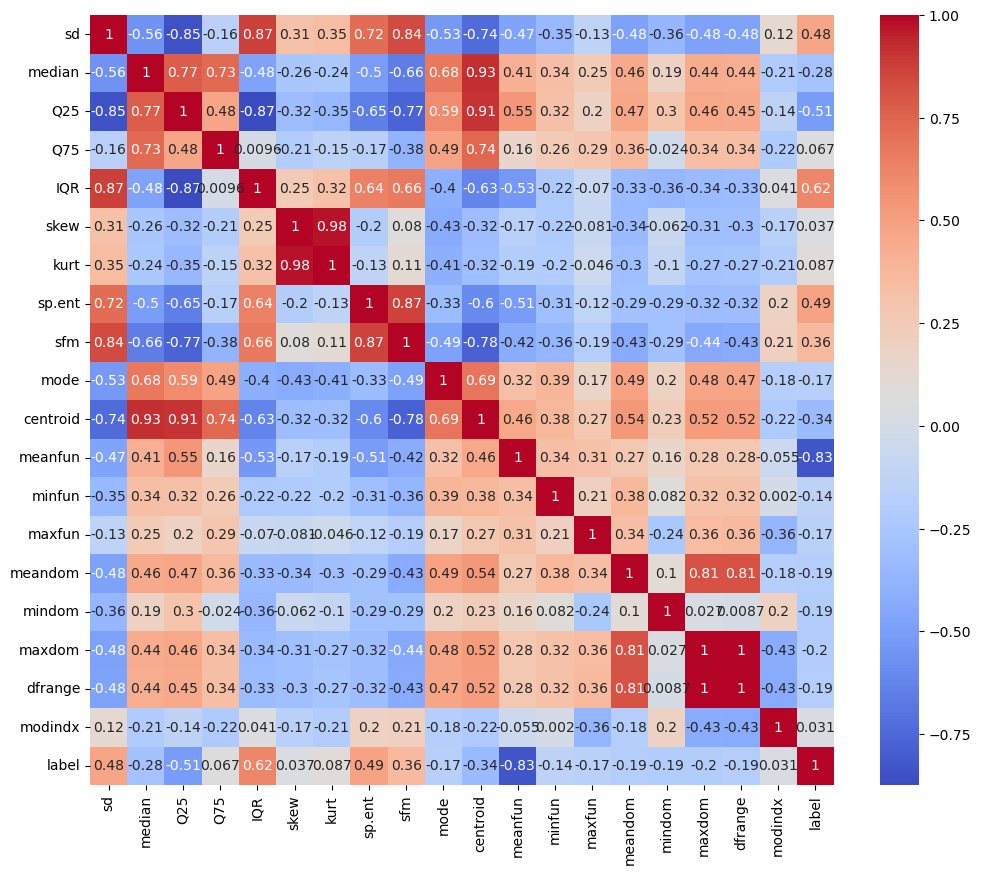

In [4]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [5]:
#features altamente correlacionadas
# median -> centroid
# skew <-> kurt
# sp.ent <-> sfm
# maxdom <-> dfrange
df_relevant = df.drop(['centroid', 'skew', 'sp.ent', 'dfrange'], axis=1)
df_relevant.describe()


,sd,median,Q25,Q75,IQR,kurt,sfm,mode,meanfun,minfun,maxfun,meandom,mindom,maxdom,modindx,label
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.057126,0.185621,0.140456,0.224765,0.084309,36.568461,0.408216,0.165282,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,0.173752,0.500000
std,0.016652,0.036360,0.048680,0.023639,0.042783,134.928661,0.177521,0.077203,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,0.119454,0.500079
min,0.018363,0.010975,0.000229,0.042946,0.014558,2.068455,0.036876,0.000000,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.041954,0.169593,0.111087,0.208747,0.042560,5.669547,0.258041,0.118016,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,0.099766,0.000000
50%,0.059155,0.190032,0.140286,0.225684,0.094280,8.318463,0.396335,0.186599,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,0.139357,0.500000
75%,0.067020,0.210618,0.175939,0.243660,0.114175,13.648905,0.533676,0.221104,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,0.209183,1.000000
max,0.115273,0.261224,0.247347,0.273469,0.252225,1309.612887,0.842936,0.280000,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,0.932374,1.000000


In [6]:
#normalizar
scaler = StandardScaler()
cols_scale = ['kurt', 'maxdom']
df_relevant[cols_scale] = scaler.fit_transform(df_relevant[cols_scale])

In [7]:
train, test = train_test_split(df_relevant, train_size=0.8)

In [8]:
new_feature_cols = ['sd', 'median', 'Q25', 'Q75', 'IQR', 'kurt', 'sfm', 'mode', 'meanfun', 'minfun', 'maxfun', 'meandom', 'mindom', 'maxdom', 'modindx']
X_train = train[new_feature_cols]
X_test = test[new_feature_cols]
Y_train = train['label']
Y_test = test['label']

In [9]:
logreg = LogisticRegression(random_state=16, max_iter=1000)
logreg.fit(X_train, Y_train)

LogisticRegression(max_iter=1000, random_state=16)

In [10]:
y_pred = logreg.predict(X_test)

In [11]:
cnf_matrix = metrics.confusion_matrix(Y_test, y_pred)
cnf_matrix

array([[276,  44],
       [  6, 308]], dtype=int64)

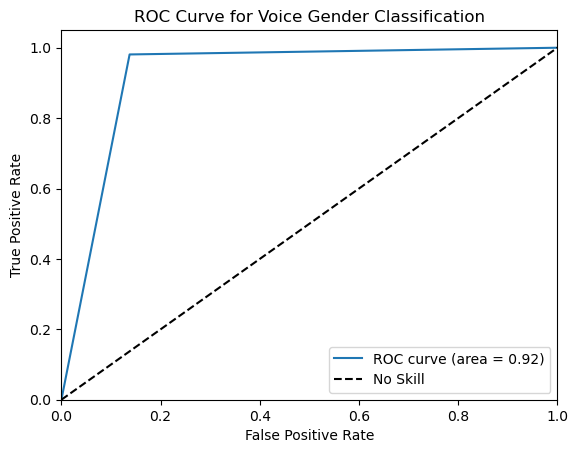

In [12]:
#ROC
fp_rate, tp_rate, thresholds = roc_curve(Y_test, y_pred)
roc_auc = auc(fp_rate, tp_rate)
#plot
plt.figure()
plt.plot(fp_rate, tp_rate, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Voice Gender Classification')
plt.legend()
plt.show()

In [13]:
#CALCULAR F1 SCORE PARA AVALIAR O MODELO - FALTA THRESHOLD
tp = cnf_matrix[0][0]
fp = cnf_matrix[0][1]
fn = cnf_matrix[1][0]
#precision = true_positives/(true_positives+false_positives)
precision = tp/(tp+fp)
print(f"Precision: {precision}")
#recall = true_positives/(true_positives+false_negatives)
recall = tp/(tp+fp)
print(f"Recall: {recall}")

Precision: 0.8625
Recall: 0.8625


In [15]:
thresholds = np.linspace(0, 1, 100)

from sklearn.metrics import f1_score

f1_scores = []
for thresh in thresholds:
    # Converter probabilidades para classes (0 ou 1) com base no threshold
    y_t = (y_pred >= thresh).astype(int)
    
    # Calcular a F1-score e armazenar o valor
    f1 = f1_score(Y_test, y_t)
    f1_scores.append(f1)

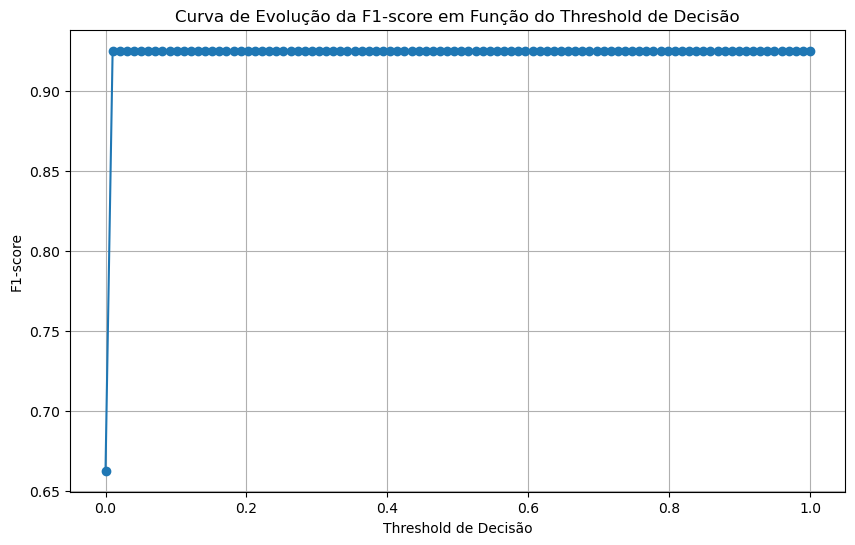

Melhor Threshold: 0.010101010101010102
Melhor F1-score: 0.924924924924925


In [17]:
plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores, marker='o', linestyle='-')
plt.xlabel('Threshold de Decisão')
plt.ylabel('F1-score')
plt.title('Curva de Evolução da F1-score em Função do Threshold de Decisão')
plt.grid(True)
plt.show()

melhor_f1 = max(f1_scores)
melhor_threshold = thresholds[np.argmax(f1_scores)]
print(f"Melhor Threshold: {melhor_threshold}")
print(f"Melhor F1-score: {melhor_f1}")

In [22]:
y_pred_melhor = (y_pred >= melhor_threshold).astype(int)

matriz_confusao = metrics.confusion_matrix(Y_test, y_pred_melhor)

acuracia = metrics.accuracy_score(Y_test, y_pred_melhor)

print(f"Matriz de Confusão:\n{matriz_confusao}")
print(f"Acurácia: {acuracia:.2f}")

Matriz de Confusão:
[[276  44]
 [  6 308]]
Acurácia: 0.92


# Classificação multi-classe

In [23]:
#Treino
with open('./train/X_train.txt', 'r') as file:
    lines = file.readlines()
data_x = [line.strip().split() for line in lines]
X_train = pd.DataFrame(data_x)
X_train_arr = np.array(X_train)

with open('./train/y_train.txt', 'r') as file:
    lines = file.readlines()
data_y = [line.strip().split() for line in lines]
y_train = pd.DataFrame(data_y)
y_train_arr = np.array(y_train)

#Teste
with open('./test/X_test.txt', 'r') as file:
    lines = file.readlines()
data_x = [line.strip().split() for line in lines]
X_test = pd.DataFrame(data_x)

with open('./test/y_test.txt', 'r') as file:
    lines = file.readlines()
data_y = [line.strip().split() for line in lines]
y_test = pd.DataFrame(data_y)
y_test_arr = y_test.values.ravel()

In [34]:
X_train.tail()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
7347,2.9966534e-001,-5.7193414e-002,-1.8123302e-001,-1.9538652e-001,3.9904850e-002,7.7078081e-002,-2.8230064e-001,4.3615631e-002,6.0410083e-002,2.1079544e-001,...,-7.0156695e-002,-5.8843274e-001,-8.8032443e-001,-1.9043686e-001,8.2971842e-001,2.0697215e-001,-4.2561858e-001,-7.9188305e-001,2.3860439e-001,4.9819139e-002
7348,2.7385271e-001,-7.7493259e-003,-1.4746837e-001,-2.3530853e-001,4.8162805e-003,5.9279994e-002,-3.2255234e-001,-2.9456250e-002,8.0585116e-002,1.1744028e-001,...,1.6525919e-001,-3.9073832e-001,-6.8074445e-001,6.4906712e-002,8.7567905e-001,-8.7903279e-001,4.0021936e-001,-7.7183960e-001,2.5267595e-001,5.0052558e-002
7349,2.7338737e-001,-1.7010616e-002,-4.5021828e-002,-2.1821818e-001,-1.0382198e-001,2.7453270e-001,-3.0451515e-001,-9.8913034e-002,3.3258449e-001,4.3998772e-002,...,1.9503401e-001,2.5145333e-002,-3.0402936e-001,5.2805928e-002,-2.6672437e-001,8.6440401e-001,7.0116882e-001,-7.7913261e-001,2.4914484e-001,4.0811188e-002
7350,2.8965416e-001,-1.8843044e-002,-1.5828059e-001,-2.1913944e-001,-1.1141169e-001,2.6889320e-001,-3.1048749e-001,-6.8200325e-002,3.1947326e-001,1.0170184e-001,...,1.3865423e-002,6.3906883e-002,-3.4431361e-001,-1.0136012e-001,7.0073969e-001,9.3667394e-001,-5.8947895e-001,-7.8518142e-001,2.4643223e-001,2.5339478e-002
7351,3.5150347e-001,-1.2423118e-002,-2.0386717e-001,-2.6927044e-001,-8.7211541e-002,1.7740393e-001,-3.7740405e-001,-3.8678063e-002,2.2942952e-001,2.6901269e-001,...,-5.8401607e-002,-3.8705200e-001,-7.4073820e-001,-2.8008805e-001,-7.7392783e-003,-5.6087594e-002,-6.1695645e-001,-7.8326693e-001,2.4680852e-001,3.6694843e-002


In [25]:
classes = np.unique(y_train_arr)
len(classes)

6

In [26]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, f1_score

In [27]:
model = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=200)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
f1_scorer = make_scorer(f1_score, average='weighted')

best_f1_score = 0
best_model = None
for fold, (train_index, test_index) in enumerate(kfold.split(X_train_arr)):
    X, X_val = X_train_arr[train_index], X_train_arr[test_index]
    y, y_val = y_train_arr[train_index], y_train_arr[test_index]

    model.fit(X, y)
    y_pred = model.predict(X_val)
    f1 = f1_score(y_val, y_pred, average='weighted')
#     print(f"F1 score: {f1}")
    
    if(f1 > best_f1_score):
        best_f1_score = f1
        best_model = model

print(f"Best f1_score: {best_f1_score}")

C:\Users\Mariano Cho\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Mariano Cho\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Mariano Cho\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

Best f1_score: 0.9863945578231292


Optei por utilizar a função softmax, pois para esse tanto de classe, o one vs all poderia demorar muito.

In [28]:
y_test_pred = best_model.predict(X_test)

In [33]:
# Obtendo matriz de confusão
multi_confusion = metrics.confusion_matrix(y_test_arr, y_test_pred)
multi_acuracia = metrics.accuracy_score(y_test_arr, y_test_pred)
print(f"Matriz de Confusão:\n{multi_confusion}")
print(f"Acurácia: {multi_acuracia:.2f}")

Matriz de Confusão:
[[494   0   2   0   0   0]
 [ 25 446   0   0   0   0]
 [  5   9 406   0   0   0]
 [  0   3   0 432  56   0]
 [  1   0   0  13 518   0]
 [  0   0   0   0   0 537]]
Acurácia: 0.96


Fazer a classificação com kNN

Duvida: como sei quais valores de k testar?

In [35]:
from sklearn.neighbors import KNeighborsClassifier

f1_scorer = make_scorer(f1_score, average='weighted')
best_f1_score = 0
best_model = None
best_k = -1
for k in range(85, 100):
    for fold, (train_index, test_index) in enumerate(kfold.split(X_train_arr)):
        X, X_val = X_train_arr[train_index], X_train_arr[test_index]
        y, y_val = y_train_arr[train_index], y_train_arr[test_index]

        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X, y)
        y_pred = knn.predict(X_val)
        f1 = f1_score(y_val, y_pred, average='weighted')

        if(f1 > best_f1_score):
            best_f1_score = f1
            bestk_k = k
            best_model = model

C:\Users\Mariano Cho\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Mariano Cho\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Mariano Cho\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Mariano Cho\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

C:\Users\Mariano Cho\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Mariano Cho\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Mariano Cho\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Mariano Cho\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

C:\Users\Mariano Cho\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Mariano Cho\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Mariano Cho\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Mariano Cho\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

In [37]:
print(f"Best_k: {bestk_k}")
print(f"Best_f1_score: {best_f1_score}")

Best_k: 85
Best_f1_score: 0.9321951755678801


In [38]:
y_test_pred = best_model.predict(X_test)
k_confusion = metrics.confusion_matrix(y_test_arr, y_test_pred)
k_acuracia = metrics.accuracy_score(y_test_arr, y_test_pred)
print(f"Matriz de Confusão:\n{k_confusion}")
print(f"Acurácia: {k_acuracia:.2f}")

Matriz de Confusão:
[[494   0   2   0   0   0]
 [ 25 446   0   0   0   0]
 [  5   9 406   0   0   0]
 [  0   3   0 432  56   0]
 [  1   0   0  13 518   0]
 [  0   0   0   0   0 537]]
Acurácia: 0.96
